In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #서브 패키지 pyplot 사용
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
else:
    print('Unknown system...  sorry~~~')

In [4]:
import seaborn as sns #seaborn 패키지 임포트

In [5]:
data=pd.read_csv('project1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIG_CD       88 non-null     int64  
 1   SIG_KOR_NM   88 non-null     object 
 2   유소년비율        88 non-null     float64
 3   조출생률         88 non-null     float64
 4   1인 가구비율      88 non-null     float64
 5   터널수          88 non-null     int64  
 6   만명당 매장 수     88 non-null     float64
 7   만명 당 의료기관 수  88 non-null     float64
 8   만명당 3차병원수    88 non-null     float64
 9   만명당 2차병원 수   88 non-null     float64
 10  만명당 1차병원 수   88 non-null     float64
 11  만명당 요양병원 수   88 non-null     float64
 12  만먕당 한의원 수    88 non-null     float64
 13  1차산업비율       88 non-null     float64
 14  2차산업비율       88 non-null     float64
 15  ktx거리        88 non-null     float64
 16  빈집비율         88 non-null     float64
 17  산지면적/도시면적    88 non-null     float64
 18  재정자립도        88 non-null     float64
 19  연평균인구증감률  

In [6]:
pj_data = data.drop(['SIG_CD','SIG_KOR_NM','시도'], axis=1)
pj_data.set_index('시군구', inplace=True)
pj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   유소년비율        88 non-null     float64
 1   조출생률         88 non-null     float64
 2   1인 가구비율      88 non-null     float64
 3   터널수          88 non-null     int64  
 4   만명당 매장 수     88 non-null     float64
 5   만명 당 의료기관 수  88 non-null     float64
 6   만명당 3차병원수    88 non-null     float64
 7   만명당 2차병원 수   88 non-null     float64
 8   만명당 1차병원 수   88 non-null     float64
 9   만명당 요양병원 수   88 non-null     float64
 10  만먕당 한의원 수    88 non-null     float64
 11  1차산업비율       88 non-null     float64
 12  2차산업비율       88 non-null     float64
 13  ktx거리        88 non-null     float64
 14  빈집비율         88 non-null     float64
 15  산지면적/도시면적    88 non-null     float64
 16  재정자립도        88 non-null     float64
 17  연평균인구증감률     88 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 13.1+ 

In [7]:
X=pj_data
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

In [8]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [9]:
kmeans.labels_

array([3, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1, 1, 0, 2, 0, 0,
       2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 3, 1, 3, 0, 1, 1, 2,
       1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 1, 2, 2],
      dtype=int32)

In [10]:
cluster = kmeans.predict(X)
cluster

array([3, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1, 1, 0, 2, 0, 0,
       2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 3, 1, 3, 0, 1, 1, 2,
       1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 1, 2, 2],
      dtype=int32)

In [11]:
pj_data['cluster']=kmeans.labels_

In [12]:
pj_data.head(3)

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,만먕당 한의원 수,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,cluster
시군구,,,,,,,,,,,,,,,,,,,
강원도 고성군,7.629285,3.657877,0.364831,1,0.746505,8.584812,0.0,0.000000,0.000000,0.000000,1.493011,23.08,12.13,78.2998,15.6,44.137726,8.6,-2.9116,3
강원도 삼척시,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,1.523856,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,2
강원도 양구군,11.836990,7.104875,0.294097,7,0.893695,8.936950,0.0,0.000000,1.340542,0.000000,1.787390,28.26,7.83,69.6764,7.8,142.838275,8.1,-1.8544,3


In [13]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [14]:
pca_transformed=pca.fit_transform(X)

In [15]:
pca_transformed

array([[-7.37170857e-01,  2.35835229e+00],
       [ 1.93544980e+00,  7.48489350e-01],
       [-3.36398005e-01,  5.38957342e+00],
       [ 8.01667483e-02,  2.37941515e+00],
       [ 1.75023989e+00,  6.90992613e-01],
       [ 1.80537754e+00,  1.25097389e+00],
       [ 1.39353150e+00,  4.03668190e+00],
       [ 3.76795872e+00,  1.80286306e+00],
       [-1.73786538e+00,  1.40565294e-01],
       [ 9.64183545e-01,  1.41720754e+00],
       [-2.81742105e-01,  4.25859318e+00],
       [ 7.00289754e-01,  5.45028653e-01],
       [ 2.44055091e+00,  6.80965267e-01],
       [ 2.44354923e+00,  2.72396858e+00],
       [ 3.09797605e-01,  1.15989445e+00],
       [-2.07772988e-01, -1.88491884e-02],
       [-2.39705990e+00, -9.76665864e-01],
       [ 9.41653752e-01, -2.79472930e-01],
       [-2.13466432e+00, -1.12780973e+00],
       [-1.70539680e+00, -1.90365867e+00],
       [ 1.92222372e-01, -9.14215409e-01],
       [-2.10112334e+00, -8.14193764e-01],
       [ 3.21809944e+00,  6.65518255e-01],
       [-1.

In [16]:
pj_data['pca_x']=pca_transformed[:,0]
pj_data['pca_y']=pca_transformed[:,1]
pj_data.head()

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,...,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,cluster,pca_x,pca_y
시군구,,,,,,,,,,,,,,,,,,,,,
강원도 고성군,7.629285,3.657877,0.364831,1,0.746505,8.584812,0.0,0.000000,0.000000,0.000000,...,23.08,12.13,78.2998,15.6,44.137726,8.6,-2.9116,3,-0.737171,2.358352
강원도 삼척시,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,...,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,2,1.935450,0.748489
강원도 양구군,11.836990,7.104875,0.294097,7,0.893695,8.936950,0.0,0.000000,1.340542,0.000000,...,28.26,7.83,69.6764,7.8,142.838275,8.1,-1.8544,3,-0.336398,5.389573
강원도 양양군,7.984798,3.221428,0.361109,52,0.723916,7.239164,0.0,0.000000,0.000000,0.000000,...,25.15,12.57,42.4503,23.7,44.811864,14.1,0.6621,3,0.080167,2.379415
강원도 영월군,7.560308,3.207719,0.378748,11,1.043161,8.345286,0.0,0.260790,0.260790,0.260790,...,25.87,12.82,23.6510,11.3,36.154246,15.2,-0.8921,2,1.750240,0.690993


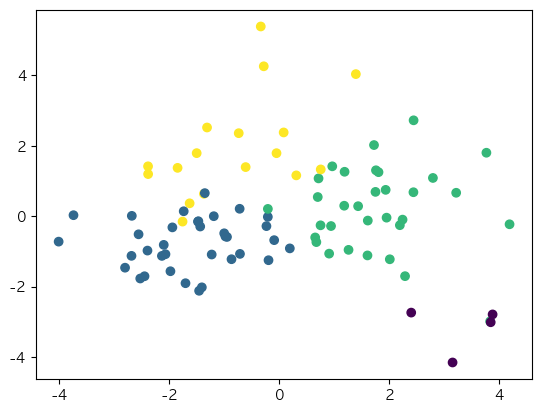

In [18]:
plt.scatter(x=pj_data.loc[:,'pca_x'],y=pj_data.loc[:,'pca_y'],
           c=pj_data['cluster'])

In [19]:
pj_data.reset_index(inplace=True)
clusterDF = pd.DataFrame(data=pca_transformed, columns=['ftr1','ftr2'])
clusterDF['cluster'] = pj_data['cluster']
clusterDF

,ftr1,ftr2,cluster
0,-0.737171,2.358352,3
1,1.935450,0.748489,2
2,-0.336398,5.389573,3
3,0.080167,2.379415,3
4,1.750240,0.690993,2
...,...,...,...
83,0.674749,-0.735582,2
84,-0.868643,-1.222111,1
85,-0.950806,-0.588933,1
86,1.610504,-0.123824,2


In [20]:
clusterDF

,ftr1,ftr2,cluster
0,-0.737171,2.358352,3
1,1.935450,0.748489,2
2,-0.336398,5.389573,3
3,0.080167,2.379415,3
4,1.750240,0.690993,2
...,...,...,...
83,0.674749,-0.735582,2
84,-0.868643,-1.222111,1
85,-0.950806,-0.588933,1
86,1.610504,-0.123824,2


In [21]:
centers=kmeans.cluster_centers_
centers

array([[-0.14933346, -0.19166155,  0.87764784, -0.72137798,  0.90972237,
         0.08918593,  3.91204572,  1.20441988,  0.4899375 ,  1.45801459,
         1.52885435, -2.03138619,  0.89516063, -1.09662992, -0.71623528,
        -0.85741742,  1.03048878,  0.42522637],
       [-0.65898232, -0.31493598,  0.35003842,  0.03782421, -0.57907803,
         0.76797669, -0.18628789, -0.37152012,  0.07124145,  0.3817354 ,
         0.17001129,  0.76976399, -0.52718809, -0.00955612,  0.43297748,
         0.09246307, -0.52498785, -0.30429462],
       [ 0.5784885 ,  0.17787727, -0.42644442,  0.24574415,  0.46197798,
        -0.51979354, -0.18628789,  0.48578509, -0.29307698, -0.1616124 ,
         0.17820853, -0.61087482,  0.86563299, -0.42373455, -0.27308621,
        -0.37597182,  0.7854534 ,  0.19157878],
       [ 0.30294607,  0.35866664, -0.12445382, -0.3707146 ,  0.10856153,
        -0.62367849, -0.18628789, -0.43291756,  0.28972134, -0.8247765 ,
        -1.04520501,  0.04304701, -0.75466558,  1.075

In [22]:
unique_labels=np.unique(cluster)
unique_labels

array([0, 1, 2, 3], dtype=int32)

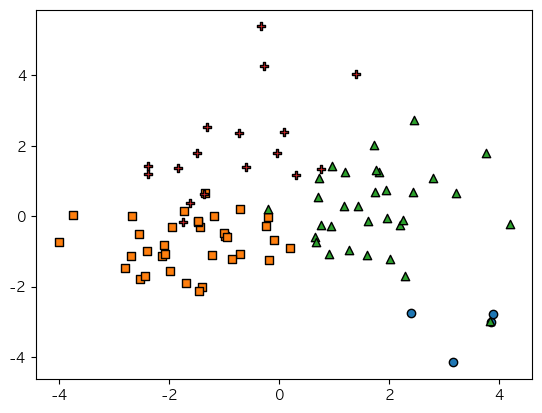

In [23]:
markers=['o','s','^','P','D','H','x']

for target in unique_labels :
    target_cluster = clusterDF[clusterDF['cluster']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
               edgecolor='k', marker=markers[target])
plt.show()

In [24]:
target_cluster

,ftr1,ftr2,cluster
0,-0.737171,2.358352,3
2,-0.336398,5.389573,3
3,0.080167,2.379415,3
6,1.393531,4.036682,3
10,-0.281742,4.258593,3
14,0.309798,1.159894,3
28,-2.385306,1.196700,3
33,-2.386691,1.417446,3
36,0.754519,1.328978,3
46,-1.369810,0.636173,3


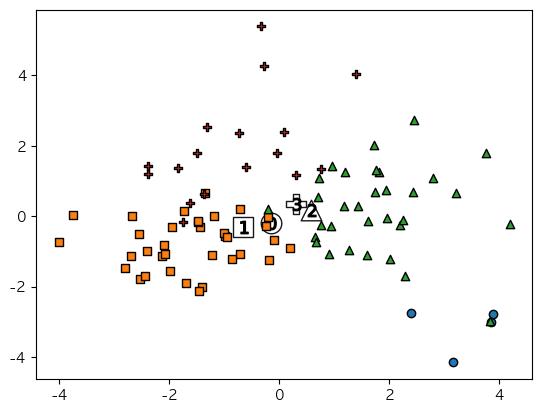

In [25]:
for label in unique_labels:
    
    label_cluster=clusterDF[clusterDF['cluster']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                edgecolor='k', marker=markers[label])
    
    center_x_y=centers[label]
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=220, color='white',
               alpha=0.9, edgecolor='k',  marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=80, color='k',
                edgecolor='k', marker='$%d$' % label)
    
    
plt.show()

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [27]:
pj_data.set_index('시군구',inplace=True)
pj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   유소년비율        88 non-null     float64
 1   조출생률         88 non-null     float64
 2   1인 가구비율      88 non-null     float64
 3   터널수          88 non-null     int64  
 4   만명당 매장 수     88 non-null     float64
 5   만명 당 의료기관 수  88 non-null     float64
 6   만명당 3차병원수    88 non-null     float64
 7   만명당 2차병원 수   88 non-null     float64
 8   만명당 1차병원 수   88 non-null     float64
 9   만명당 요양병원 수   88 non-null     float64
 10  만먕당 한의원 수    88 non-null     float64
 11  1차산업비율       88 non-null     float64
 12  2차산업비율       88 non-null     float64
 13  ktx거리        88 non-null     float64
 14  빈집비율         88 non-null     float64
 15  산지면적/도시면적    88 non-null     float64
 16  재정자립도        88 non-null     float64
 17  연평균인구증감률     88 non-null     float64
 18  cluster      88 non-null     int32  
 19  pca

In [28]:
pj_data.to_csv('project_result.csv')

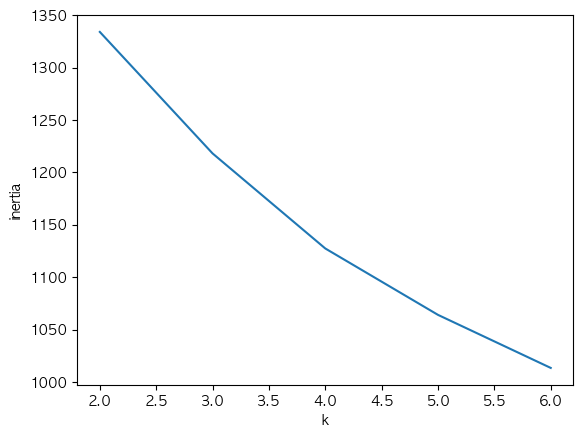

In [29]:
inertia=[]
for k in range(2,7):
    km=KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.savefig('approprate_k.png')
plt.show()

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

Automatically created module for IPython interactive environment


In [31]:
X= pca_transformed

In [32]:
y= kmeans.labels_

For n_clusters = 2 The average silhouette_score is : 0.42181146387443375
For n_clusters = 3 The average silhouette_score is : 0.4164510632920569
For n_clusters = 4 The average silhouette_score is : 0.44319011511377243
For n_clusters = 5 The average silhouette_score is : 0.3746830048592625
For n_clusters = 6 The average silhouette_score is : 0.37870995902535126


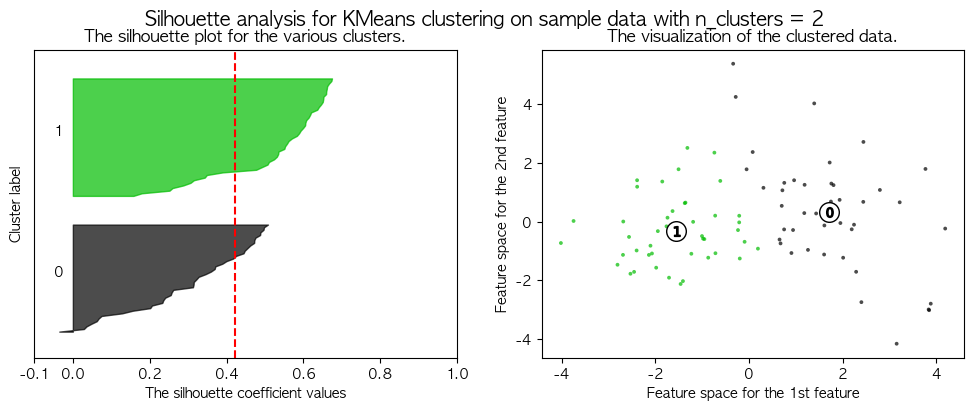

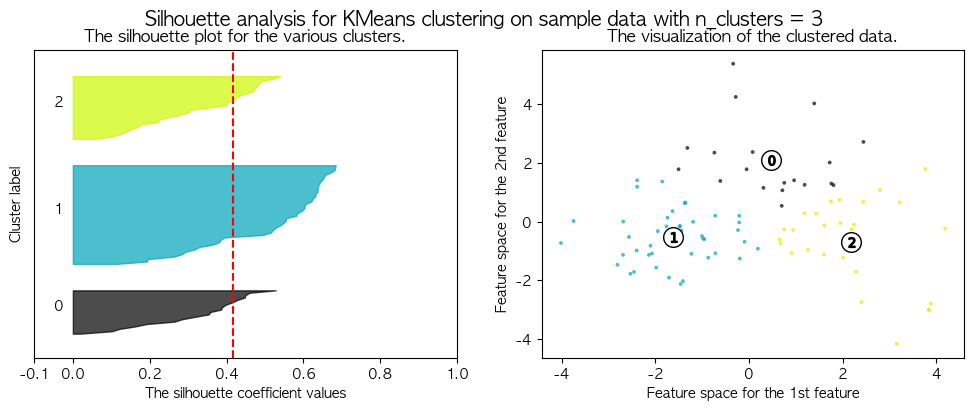

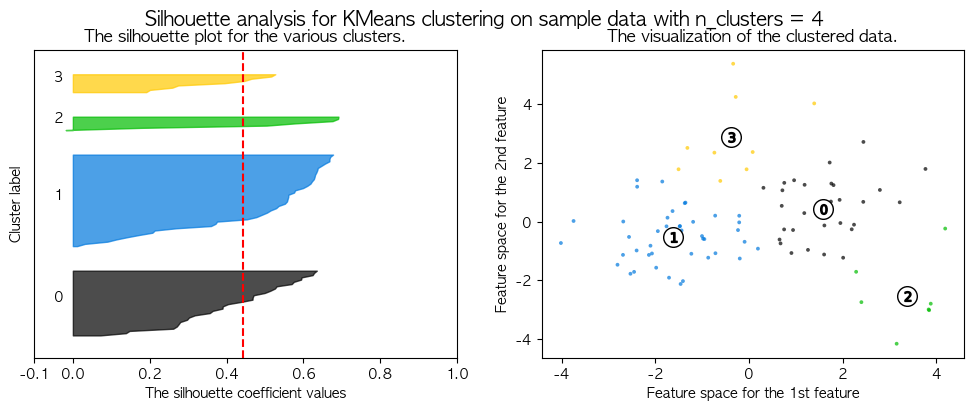

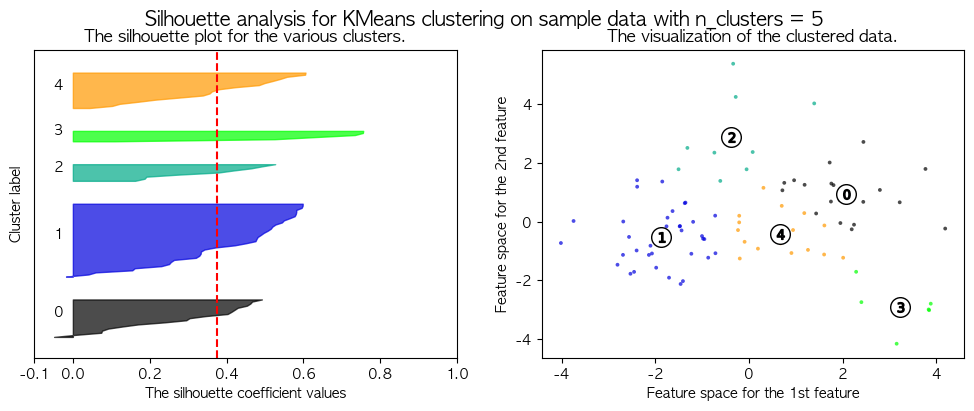

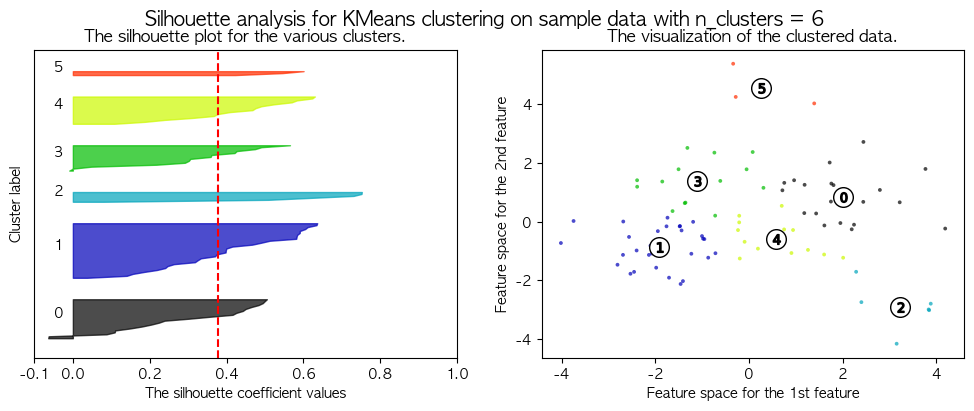

In [33]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 